## Download the text doc


#### file -> spp.docx, course.pdf
#### https://mitu.co.in/dataset

In [1]:
# with open('SMSSpamCollection', 'r') as f:
#     text_sms = f.readlines()
# text_sms


In [2]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, KFold
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

sms_df = pd.read_csv('SMSSpamCollection.csv', sep='\t' , names=['label', 'message'])
# sms_df = pd.DataFrame(data=text_sms, columns=['text'])
sms_df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
# # splitting labels and messages from main text using \t as the delimiter 
# sms_df['label'] = sms_df['text'].str.split('\t').str[0]
# sms_df['message'] = sms_df['text'].str.split('\t').str[1].str.strip()
# sms_df.drop(columns=['text'], inplace=True)
# sms_df

In [4]:
# Explore the data
X = sms_df['message']
y = sms_df['label']
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [5]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

<Axes: >

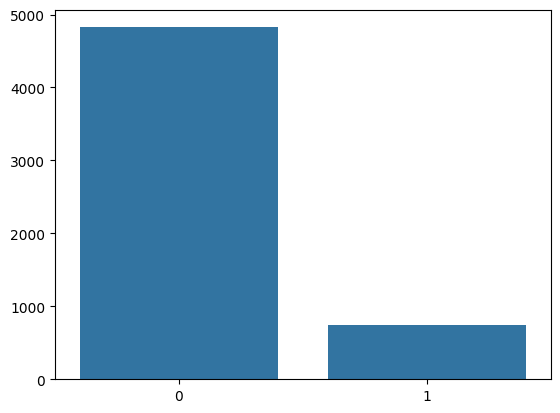

In [6]:
# value counts of y
value_df = y.value_counts()
sns.barplot([value_df['ham'], value_df['spam']]) # checking for the disparity between the classfied labels

([<matplotlib.patches.Wedge at 0x1a92e5fe840>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59%'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41%')])

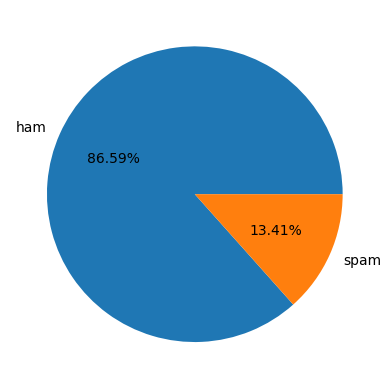

In [7]:
plt.pie(value_df, labels=value_df.index, autopct='%2.2f%%') # pie chart visualization

In [8]:
# pip install wordcloud pillow -U

In [9]:
# trying to store all 'ham' messages in a single string, same with spam. Creation of two different wordclouds
ham = X[y=='ham']
display(ham)
len(ham)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
                              ...                        
5565                                         Huh y lei...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 4825, dtype: object

4825

In [10]:
# for spam
spam = X[y=='spam']
display(spam)
len(spam)

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: message, Length: 747, dtype: object

747

In [11]:
# making a single string store all the messages of ham and another one for spam
ham_str = ' '.join(ham)
spam_str = ' '.join(spam)
len(ham_str)

349727

In [12]:
len(spam_str)

104333

In [13]:
# importing wordcloud
from wordcloud import WordCloud


In [14]:
# finding a system font path
from matplotlib import font_manager

# Find a system font path
font_path = font_manager.findfont('MonoLisa')

findfont: Font family ['MonoLisa'] not found. Falling back to DejaVu Sans.


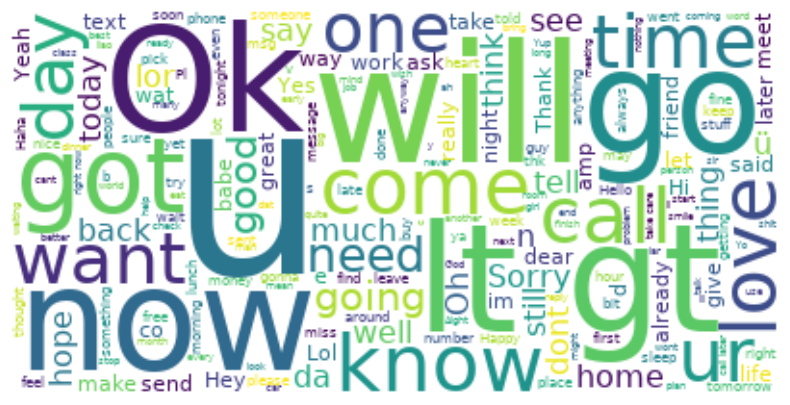

In [15]:
# Not spam (ham) wordcloud
wc_notspam = WordCloud(font_path=font_path, background_color='white', max_words=1000).generate(ham_str)
# the above variable will be passed to imshow, since the wordcloud has been created and now needs to be displayed
plt.figure(figsize=(10,5))
plt.imshow(wc_notspam, interpolation='bilinear')
plt.axis(False)
plt.show()


In [16]:
wc_notspam.words_

{'u': 1.0,
 'will': 0.33096446700507615,
 'lt gt': 0.2802030456852792,
 'Ok': 0.2649746192893401,
 'now': 0.2578680203045685,
 'go': 0.25583756345177666,
 'got': 0.2365482233502538,
 'know': 0.2182741116751269,
 'come': 0.21116751269035533,
 'call': 0.20812182741116753,
 'love': 0.20609137055837565,
 'time': 0.20101522842639594,
 'ur': 0.19898477157360406,
 'day': 0.18883248730964466,
 'want': 0.18781725888324874,
 'one': 0.17766497461928935,
 'need': 0.17563451776649747,
 'going': 0.1715736040609137,
 'good': 0.166497461928934,
 'Sorry': 0.15939086294416244,
 'ü': 0.15634517766497463,
 'home': 0.15532994923857868,
 'still': 0.1532994923857868,
 'da': 0.14416243654822336,
 'see': 0.14213197969543148,
 'today': 0.1401015228426396,
 'think': 0.13401015228426397,
 'n': 0.132994923857868,
 'lor': 0.12791878172588833,
 'tell': 0.12690355329949238,
 'dont': 0.12284263959390863,
 'say': 0.12081218274111676,
 'back': 0.12081218274111676,
 'Oh': 0.11573604060913706,
 'thing': 0.1147208121827411

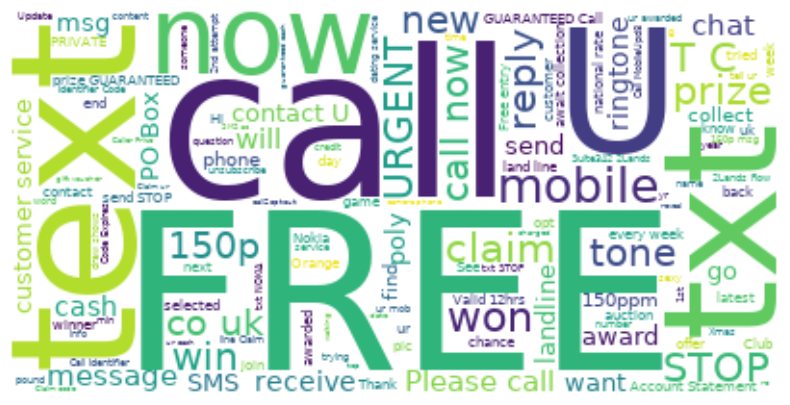

In [17]:
# Spam wordcloud
wc_spam = WordCloud(font_path=font_path, background_color='white', max_words=1000).generate(spam_str)
# the above variable will be passed to imshow, since the wordcloud has been created and now needs to be displayed
plt.figure(figsize=(10,5))
plt.imshow(wc_spam, interpolation='bilinear')
plt.axis(False)
plt.show()

In [18]:
wc_spam.words_

{'FREE': 1.0,
 'call': 0.875,
 'text': 0.63,
 'U': 0.59,
 'txt': 0.5,
 'now': 0.5,
 'mobile': 0.5,
 'won': 0.365,
 'T C': 0.33,
 'claim': 0.315,
 'STOP': 0.315,
 'reply': 0.31,
 'prize': 0.305,
 'call now': 0.29,
 'URGENT': 0.28,
 'win': 0.27,
 'new': 0.27,
 'tone': 0.265,
 'co uk': 0.245,
 '150p': 0.24,
 'Please call': 0.23,
 'will': 0.22,
 'message': 0.21,
 'chat': 0.2,
 'ringtone': 0.18,
 'cash': 0.17,
 'receive': 0.165,
 'send': 0.145,
 'award': 0.14,
 'want': 0.135,
 'poly': 0.135,
 'customer service': 0.135,
 'PO Box': 0.135,
 'contact U': 0.135,
 'msg': 0.125,
 'go': 0.125,
 'SMS': 0.12,
 'landline': 0.12,
 '150ppm': 0.115,
 'find': 0.115,
 'collect': 0.115,
 'phone': 0.115,
 'GUARANTEED Call': 0.115,
 'day': 0.11,
 'uk': 0.11,
 'offer': 0.11,
 'chance': 0.11,
 'prize GUARANTEED': 0.11,
 'contact': 0.105,
 'pic': 0.105,
 'week': 0.1,
 'customer': 0.1,
 'send STOP': 0.1,
 'national rate': 0.1,
 'back': 0.095,
 'ur': 0.095,
 'awarded': 0.095,
 'See': 0.095,
 'Club': 0.095,
 'Orang

## Data Preparation

1. Tokenization
2. Remove Punctuations
3. Remove Stopwords
4. Remove Suffixes(Stemming)

In [19]:
sent_test = 'Hello Friends! How are you? I Like Python Programming.'
tokens1 = word_tokenize(sent_test)
tokens1

['Hello',
 'Friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'I',
 'Like',
 'Python',
 'Programming',
 '.']

In [20]:
# remove puncts
tokens2 = [word for word in tokens1 if word.isalnum()]
tokens2

['Hello', 'Friends', 'How', 'are', 'you', 'I', 'Like', 'Python', 'Programming']

In [21]:
# remove stopwords
from nltk.corpus import stopwords
swords = stopwords.words('english')
tokens3 = [word for word in tokens2 if word.lower() not in swords]
tokens3

['Hello', 'Friends', 'Like', 'Python', 'Programming']

In [22]:
# stemming/ suffixes removal
from nltk.stem import PorterStemmer
ps = PorterStemmer()
# remove the affixes
tokens4 = [ps.stem(word) for word in tokens3]
tokens4

['hello', 'friend', 'like', 'python', 'program']

# Creating a function that applies all of the above steps

In [23]:
def data_cleaning(sent, lang='english', stemmer='porter'): # porter, lancaster, snowball
    from nltk.corpus import stopwords
    from nltk.stem import SnowballStemmer, PorterStemmer, LancasterStemmer
    ps = PorterStemmer()
    ls = LancasterStemmer()
    ss = SnowballStemmer(language=lang)
    swords = stopwords.words(lang)
    if stemmer == 'porter':
        stem_obj = ps
    elif stemmer == 'lancaster':
        stem_obj = ls
    elif stemmer == 'snowball':
        stem_obj = ss
    tokens = [stem_obj.stem(word) for word in word_tokenize(sent) if word.lower() not in swords and word.isalpha()]    # ignoring numerical values
    return tokens

In [24]:
# testing the above function
tokens4 = data_cleaning(sent_test)
tokens4

['hello', 'friend', 'like', 'python', 'program']

In [25]:
# cleaning all the messages in X
X.apply(data_cleaning) #args=('english','snowball')

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, wkli, comp, win, fa, cup, final,...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [time, tri, contact, u, pound, prize, claim, e...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: message, Length: 5572, dtype: object

## Apply TF*IDF Vectorizer


In [26]:
tfidf = TfidfVectorizer(analyzer=data_cleaning)
x_new = tfidf.fit_transform(X)
x_new

<5572x5926 sparse matrix of type '<class 'numpy.float64'>'
	with 44423 stored elements in Compressed Sparse Row format>

In [27]:
x_new.shape

(5572, 5926)

In [28]:
tfidf.get_feature_names_out()

array(['aa', 'aah', 'aaniy', ..., 'zyada', 'é', 'ü'], dtype=object)

In [29]:
len(tfidf.get_feature_names_out())

5926

In [30]:
### Cross-Validation
X_train, X_test, y_train, y_test = train_test_split(x_new, y, random_state=0) # default test_size=0.25


In [31]:
X_train.shape

(4179, 5926)

In [32]:
X_test.shape

(1393, 5926)

### Build the SVM Model

In [33]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [34]:
y_pred = svm.predict(X_test) # getting predicted values of the model

In [35]:
# performance evaluation
accuracy_score(y_test, y_pred)

0.9827709978463748

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



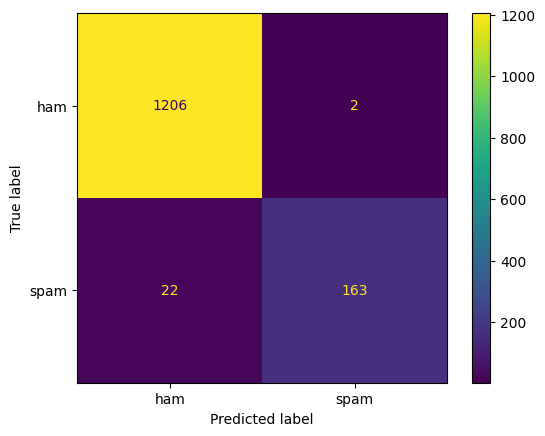

In [37]:
# confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


### Prediction on unknown messages

In [38]:
# file: sample.csv
# https://mitu.co.in/dataset

In [39]:
with open('sample.csv', 'r') as f:
    sents = f.readlines()
sents

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.\n',
 'As a valued customer  I am pleased to advise you that following recent review of your Mob No. you are awarded with a ?1500 Bonus Prize  call 09066364589\n',
 'Today is "song dedicated day.." Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...\n']

In [40]:
# transform to TF-IDF matrix using the previously defined tfidf transform class object
sample_new = tfidf.transform(pd.Series(sents))
sample_new

<3x5926 sparse matrix of type '<class 'numpy.float64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [41]:
# predicting the class of the sentences
y_pred = svm.predict(sample_new)

In [42]:
y_pred # predicted classes of the sample data

array(['ham', 'spam', 'ham'], dtype=object)

In [43]:
import joblib # saving the model in the current working directory
joblib.dump(svm, 'classfier.model')

['classfier.model']

In [44]:
## save the tfidf vectorizer transformation too to access it later

joblib.dump(tfidf, 'tfidf.model')

['tfidf.model']

In [45]:
## loading the classifier and tfidf transform
classifier = joblib.load('classfier.model')
tfidf = joblib.load('tfidf.model')
classifier.predict(tfidf.transform(sents))

array(['ham', 'spam', 'ham'], dtype=object)